In [162]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
from decimal import Decimal

register_matplotlib_converters()


# set up the figure size
%matplotlib inline

# import data file

file_path = '/Users/Mahfuz-Tamim/Thinkful/SeabornExercises/WELLCOME_APCspend2013_forThinkful.csv'
open_data = pd.read_csv(file_path, encoding='unicode_escape')

In [111]:
open_data.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [112]:
open_data.dtypes

PMID/PMCID                                             object
Publisher                                              object
Journal title                                          object
Article title                                          object
COST (£) charged to Wellcome (inc VAT when charged)    object
dtype: object

In [113]:
open_data.shape

(2127, 5)

In [114]:
#rename df to start cleaning it with a cleaning script
df = open_data.copy()

### Assignment: 
To complete this challenge, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

In [115]:
# Strip and make column names lowercase so that they are easy to manage. 
df.columns = df.columns.str.strip().str.lower()
# Replace characters or remove spaces and make all words lowercase.
df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')

In [116]:
# What's inside the file? Let's take a preview.
column_names = list(df.columns.values) 
print(column_names)

['pmid_pmcid', 'publisher', 'journal_title', 'article_title', 'cost_£_charged_to_wellcome_inc_vat_when_charged']


In [117]:
# Split on '_' to make a shorter name for the column. We'll use the Pandas split method.

def short_col_name (df): #returns list of the first word of the current column names
    # What's inside the file? Make a list of the column names.
    column_names = list(df.columns.values) 
    # Here we make a stand-in lambda function that we title shortening
    shortening = lambda x: x.split('_')
    # Here we map the function onto the list we want to apply it to and then make the result a list
    separated = list(map(shortening, column_names)) 
    # We want only the first index in the list of lists we made in the variable called 'separated'
    new_columns = []
    #Below is a function to retrieve the names we want for the new columsn from the variable 'separated'
    i = 0
    while (i < len(separated)):
        new_columns.append(separated[i][0])
        i+=1
    return (new_columns)

#Let's see if the names are the names we want
print(short_col_name(df))

['pmid', 'publisher', 'journal', 'article', 'cost']


In [118]:
# Rename the column names of df to the names from 'new_columns'
df.columns = new_columns
# Let's see how the new df looks
df.head()

,pmid,publisher,journal,article,cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [119]:
# List of unique values in each column
for column_name in new_columns:
    print("There are " + str(df[column_name].nunique()) + " unique values in column \'" + column_name + "\'.")
# How big is the df?
df.shape

There are 1880 unique values in column 'pmid'.
There are 299 unique values in column 'publisher'.
There are 984 unique values in column 'journal'.
There are 2126 unique values in column 'article'.
There are 1402 unique values in column 'cost'.


(2127, 5)

In [120]:
df1 = df.drop_duplicates().copy()
print(df1.shape, df.shape)
print("We have removed", df.shape[0] - df1.shape[0], "duplicates")

(2127, 5) (2127, 5)
We have removed 0 duplicates


In [167]:
# Here is a function we can use to see the list of repeated items. I am most curious about PMID
def listdups (df,cn): #df, dataframe of interest; cn, column name of interest
    ids = df[cn]
    df1 = df[ids.isin(ids[ids.duplicated()])].sort_values(by=cn)
    return df1

listdups(df1,"pmid").head()


,pmid,publisher,journal,article,cost
788,-,Elsevier,Studies in History and Philosophy of Science P...,Natural History and Information Overload: The ...,£2395.00
554,-,Elsevier,Endeavour,Family influence and psychiatric care: physica...,£615.72
1821,-,Taylor & Francis,Science as Culture,Walking or Waiting? Topologies of the Breeding...,£2145.60
1817,-,Taylor & Francis,English Studies,"We Cannot Be Greek Now: Age Difference, Corrup...",£2475.60
1934,-,Wiley,FEMS Microbiology Letters,Identification of type II toxin-antitoxin modu...,£2337.66


Sorting by PMID shows that sometimes, articles are duplicated but the title has an error or change in the title. Item 1235 and 1177 have the same PMID of 22735079 and the Publisher, Journal and Title are all the same except that one of the words is missing or abbreviated such that the code recognizes them as different though the article being referenced is the same.

In [122]:
listdups(df1,"article")

,pmid,publisher,journal,article,cost
1490,Pending,Public Library of Science,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£825.68
1496,NaN,Public Library of Science,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£825.68


In [123]:
df2 = df1.drop_duplicates('article').copy()
print("We have removed", df1.shape[0] - df2.shape[0], "duplicates")

We have removed 1 duplicates


In [128]:
# Make a new column that has stripped away excess spacing and have made all the letters in the name lowercase.
df2['journal_new'] = df2.journal.str.strip().str.lower()

In [129]:
df2.head()

,pmid,publisher,journal,article,cost,journal_new
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00,psychological medicine
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,biomacromolecules
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,j med chem
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,j med chem
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88,j org chem


In [165]:
# Function takes:
# df of interest
# groupc: column name by which to group by
# countc: column that needs to be counted
# x: int, how many values from the top do you want. 
# Returns df with top x values.
def topx (df,groupc,countc,x):
    df1 = df.groupby(groupc)[countc].count().sort_values(ascending = False)
    return df1[0:x].to_frame().reset_index()

dftop = topx(df2,'journal_new','article',x=None)
dftop.head()

,journal_new,article
0,plos one,189
1,journal of biological chemistry,53
2,neuroimage,29
3,nucleic acids research,26
4,plos pathogens,24


In [166]:
def costnum (df,groupc,countc,sumc):
    s1 = df.groupby(groupc)[sumc].sum()#.sort_values(ascending = False)
    s2 = df.groupby(groupc)[countc].count()#.sort_values(ascending = False)
    return pd.concat([s1, s2], axis=1).sort_values(by='article',ascending = False).reset_index()
costnum(df2,'journal_new','article','cost').head()

,journal_new,cost,article
0,plos one,£1001.03£1004.15£1011.45£1011.45£1015.73£1023....,189
1,journal of biological chemistry,£265.67£1100.00£2259.64£1019.71£1119.61£1131.0...,53
2,neuroimage,£1758.89£2345.00£1747.16£1760.94£1762.69£1762....,29
3,nucleic acids research,£1704.00£2184.00£852.00£852.00£852.00£852.00£8...,26
4,plos genetics,£1494.42£1761.48£1774.83£1676.06£1394.05£1418....,24


Cost column is not integer. Let's change that.

In [182]:
# Make a new column that has stripped away money signs and converted string to decimal.
df2['cost_new'] = df2.cost.str.strip('£$') #this is a bit rigid and should simply parse for nonnumerics
df2['cost_new'] = df2.cost_new.apply(lambda x: float(x))
df2.head()

,pmid,publisher,journal,article,cost,journal_new,cost_new
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00,psychological medicine,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,biomacromolecules,2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,j med chem,642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,j med chem,669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88,j org chem,685.88


### Assignment: 
To complete this challenge, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

In [212]:
def statcol (df,groupc,sumc): #stats of the columns
    s1 = df.groupby(groupc)[sumc].mean()#.sort_values(ascending = False
    s2 = df.groupby(groupc)[sumc].median()#.sort_values(ascending = False)    
    s3 = df.groupby(groupc)[sumc].std()#.sort_values(ascending = False) 
        #ASK ABOUT NUMPY vs PD std() function, skipna doesn't work.
    return pd.concat([s1,s2,s3], axis=1).reset_index()
# calculate mean, median and std of the costs by journal
df3 = statcol(df2,'journal_new','cost_new')
df3.columns = ['journal_new','mean_cost','median_cost','std_cost']

#calculate article count for each journal
dftop = topx(df2,'journal_new','article',x=None) 

# concatinate the two dfs
df4 = pd.merge(df3, dftop, how='inner', on = 'journal_new')

# order the dfs by article count
df5 = df4.sort_values(by='article', ascending = False)

# show top 5 of ordered df by article count
df5[0:5]

,journal_new,mean_cost,median_cost,std_cost,article
744,plos one,38951.955979,899.34,189491.236664,189
501,journal of biological chemistry,20264.633962,1314.53,137165.488398,53
677,neuroimage,2215.168276,2326.43,266.653947,29
699,nucleic acids research,1149.000000,852.00,442.940447,26
738,plos genetics,84839.435000,1718.39,281865.707794,24


In [221]:
list(dftop.journal_new[0:5])

['plos one',
 'journal of biological chemistry',
 'neuroimage',
 'nucleic acids research',
 'plos pathogens']

In [253]:
dftop5 = df2[df2.journal_new.apply(
    lambda x: x in list(dftop.journal_new[0:5]))].sort_values(
    by='cost_new', ascending = False) 
dftop5.head()

,pmid,publisher,journal,article,cost,journal_new,cost_new
1562,PMC3720940,Public Library of Science,PLoS One,Population-based CD4 counts in a rural area in...,£999999.00,plos one,999999.0
1564,PMCID:\n PMC3579793,Public Library of Science,PLoS ONE,Phagocytosis Is the Main CR3-Mediated Function...,£999999.00,plos one,999999.0
1566,PMCID:\n PMC3767740\n,Public Library of Science,PLoS ONE,Phenotypic alteration of neutrophils in the bl...,£999999.00,plos one,999999.0
149,PMC3234811,ASBMB,Journal of Biological Chemistry,Picomolar nitric oxide signals from central ne...,£999999.00,journal of biological chemistry,999999.0
1598,PMCID:\n PMC3764210\n,Public Library of Science,PLoS Pathogens,The CLIP-domain serine protease homolog SPCLIP...,£999999.00,plos pathogens,999999.0


In [248]:
def cost_check (dfa,c):
    df = dfa.reset_index(drop=True).copy()
    df[c]
    x = 0
    while x < len(df[c]):
        if df[c][x] > 500000: # replace values over 500000 because it is an egregious error
            df[c][x] = None
        elif df[c][x] > 5000: # these values may be improperly entered not considering cents
            df[c][x] = df[c][x]/100
        x+=1
    return df

In [251]:
df6 = cost_check(dftop5,'cost_new')
df6.head()

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,pmid,publisher,journal,article,cost,journal_new,cost_new
0,PMC3720940,Public Library of Science,PLoS One,Population-based CD4 counts in a rural area in...,£999999.00,plos one,NaN
1,PMCID:\n PMC3579793,Public Library of Science,PLoS ONE,Phagocytosis Is the Main CR3-Mediated Function...,£999999.00,plos one,NaN
2,PMCID:\n PMC3767740\n,Public Library of Science,PLoS ONE,Phenotypic alteration of neutrophils in the bl...,£999999.00,plos one,NaN
3,PMC3234811,ASBMB,Journal of Biological Chemistry,Picomolar nitric oxide signals from central ne...,£999999.00,journal of biological chemistry,NaN
4,PMCID:\n PMC3764210\n,Public Library of Science,PLoS Pathogens,The CLIP-domain serine protease homolog SPCLIP...,£999999.00,plos pathogens,NaN


In [252]:
df7 = df6.dropna(subset=['cost_new']).sort_values(by='cost_new', ascending = False)
df7.head()

,pmid,publisher,journal,article,cost,journal_new,cost_new
12,PMC3625125\n\n\n,Elsevier,Neuroimage,Set-level threshold-free tests on the intrinsi...,£2503.34,neuroimage,2503.34
11,PMC3625122\n\n\n,Elsevier,NeuroImage,Auditory Modulation of Visual Stimulus Encodin...,£2503.34,neuroimage,2503.34
13,23344959 PMC3585060,American Society for Biochemistry and Molecula...,Journal of Biological Chemistry,ca2+ signalling through catsper and ca2+ store...,£2501.07,journal of biological chemistry,2501.07
14,PMC3613798\n\n,Elsevier,NeuroImage,Functional Specialization and Generalization f...,£2484.23,neuroimage,2484.23
15,PMC3605597\n\n\n,Elsevier,NeuroImage,The impact of post-processing on spinal cord d...,£2466.45,neuroimage,2466.45


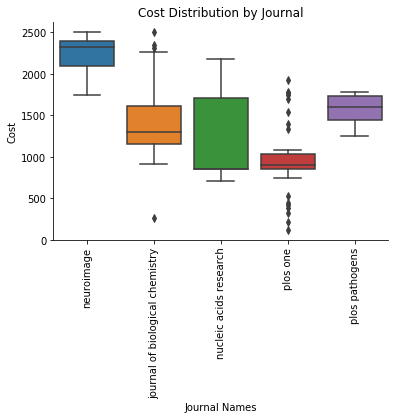

In [260]:
# Comparing groups using boxplots.
ax = sns.boxplot(x='journal_new',y='cost_new',data=df7)  
plt.title('Cost Distribution by Journal')
sns.despine(offset=0, trim=False)
ax.set(xlabel='Journal Names', ylabel='Cost')
plt.xticks(rotation=90)
#ax.legend(loc='best', bbox_to_anchor=(1.15, .5), ncol=1)
# Put a legend to the right side
#ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

plt.show()

## Future Directions: 
Work on journal names that are abbreviated in various ways and those that have type-os.